# Political Persuasion
Andrea Hrelja i Mario Sliško
10.12.2021

## Uvod
Političko uvjeravanje je proces u kojem političke kampanje pokušavaju uvjertit glasače da promjene svoje stavove u pogledu političkog pitanja. Ako želimo biti učinkoviti kada je u pitanju utjecaj na glasače, treba se usredotočiti na one koji si već pomalo na našoj strani, samo im treba mali poticaj.

Ciljanje skupe glasača se duže vrijeme odvija u politici. Tradicionalne metode ciljanja se dijele u 3 skupine:
* Geografski
* Demografski
* Individualno

Indvividualno ciljanje se smatra najefikasnijim načinom određivanja ciljane skupine. Izvodi se ispunjavanjem anketa u kojima se pokušava doznati kako će ljudi glasati, odnosno koji srani su naklonjeni. Korištenje prektivne analitike smanjuje cijenu individualnog ciljanja. Prediktivna analitika obuhvaća razne statističke tehnike od prediktivnog modeliranja, strojnog učenja do rudarenja podacima kojima analiziraju činjenice iz prošlosti i sadašnjosti kako bi napravila predviđanje budućih događaja. 

## Uplift
Uplift modeliranje je tehnika prediktivnog modeliranja koja nam omogućije identificiranje 4 skupina u koje bi svrstali glasače.

![4 kvadranta](.\img\uplift_segments.png)

Mi ćemo se fokusirati na skupinu "persuadables", jer je to jedina skupina koja može promjenti mišljenje u našu korist. Tako ćemo najefikasije iskorisiti dostupne resurse. U našem primjeru, uplift će mjeriti uspješnost promjene mišljenja u korist demokrata. 



| Naziv varijable | Opis varijable | Tip podatka |
| --------------- | -------------- | ----------- |
|AGE        |Dob glasača| INTEGER |
|HH_ND      |Broj demokrata u kućanstvu| INTEGER |
|HH_NR      |Broj republikanaca u kućanstvu| INTEGER |
|HH_NI      |Broj nezavisnih u kućanstvu| INTEGER |
|NH_WHITE   |Postotak bijele populacije u susjedstvu| INTEGER (%) |
|NH_AA      |Postotak afro-amerikananske populacije u susjedstvu| INTEGER (%) |
|NH_ASIAN   |Postotak azijatske populacije u susjedstvu| INTEGER (%) |
|NH_MULT    |Postotak multietničke populacije u susjedstvu| INTEGER (%) |
|HISP       |Postotak hispaničke populacije u susjedstvu| INTEGER (%) |
|MED_HH_INC |Prosječni prihodi kućanstva| INTEGER |
|COMM_CAR   |Postotak odlaska na posao automobilom| INTEGER (%) |
|COMM_CP    |Postotak odlaska na posao vlakom| INTEGER (%) |
|COMM_PT    |Postotak odlaska na posao javnim prijevozom| INTEGER (%) |
|COMM_WALK  |Postotak odlaska na posao šetnjom| INTEGER (%) |
|GENDER_F   |Glasač je ženskog spola| BOOLEAN |
|GENDER_M   |Glasač je muškog spola| BOOLEAN |
|H_F1       |Kućanstvo se sastoji samo od jedne žene| BOOLEAN |
|H_M1       |Kućanstvo se sastoji samo od jednog muškarca| BOOLEAN |
|PARTY_D    |Glasač je demokratskog političkog opredijeljenja| BOOLEAN |
|PARTY_I    |Glasač je nezavisnog političkog opredijeljenja| BOOLEAN |
|PARTY_R    |Glasač je republikanskog političkog opredijeljenja| BOOLEAN |
|PR_PELIG   |Postotak u kojemu je glasač glasao/la na ne-predsjedničkim primarnim izborima| INTEGER (%) |
|PP_PELIG   |Postotak u kojemu je glasač glasao/la na predsjedničkim primarnim izborima| INTEGER (%) |
|E_PELIG    |Postotak u kojemu je glasač glasao/la na bilo kojim primarnim izborima| INTEGER (%) |
|REG_DAYS   |Broj dana otkako je glasač prijavljen na trenutnu adresu| INTEGER |
|POLITICALC |Označava koliko je u kućanstvu politički aktivnih osoba| INTEGER |
|RELIGIOUSC |Označava koliko je u kućanstvu religioznih osoba| INTEGER |
|MESSAGE_A  |Označava da li je glasač dobio letak| BOOLEAN |
|MOVED_A    |Označava da li je glasač prešao u demokratsku stranku| BOOLEAN |

In [23]:
from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/Voter-Persuasion.csv')

rename_map = {
    'VOTER_ID': 'Jedinstveni identifikator glasača',
    'AGE': 'Dob glasača',
    'HH_ND': 'Broj demokrata u kućanstvu',
    'HH_NR': 'Broj republikanaca u kućanstvu',
    'HH_NI': 'Broj nezavisnih u kućanstvu',
    'NH_WHITE': 'Postotak bijele populacije u susjedstvu',
    'NH_AA': 'Postotak afro-amerikananske populacije u susjedstvu',
    'NH_ASIAN': 'Postotak azijatske populacije u susjedstvu',
    'NH_MULT': 'Postotak multietničke populacije u susjedstvu',
    'HISP': 'Postotak hispaničke populacije u susjedstvu',
    'MED_HH_INC': 'Prosječni prihodi kućanstva',
    'COMM_CAR': 'Postotak odlaska na posao automobilom',
    'COMM_CP': 'Postotak odlaska na posao vlakom',
    'COMM_PT': 'Postotak odlaska na posao javnim prijevozom',
    'COMM_WALK': 'Postotak odlaska na posao šetnjom',
    'GENDER_F': 'Glasač je ženskog spola',
    'GENDER_M': 'Glasač je muškog spola',
    'H_F1': 'Kućanstvo se sastoji samo od jedne žene',
    'H_M1': 'Kućanstvo se sastoji samo od jednog muškarca',
    'PARTY_D': 'Glasač je demokratskog političkog opredijeljenja',
    'PARTY_I': 'Glasač je nezavisnog političkog opredijeljenja',
    'PARTY_R': 'Glasač je republikanskog političkog opredijeljenja',
    'PR_PELIG': 'Postotak u kojemu je glasač glasao/la na ne-predsjedničkim primarnim izborima',
    'PP_PELIG': 'Postotak u kojemu je glasač glasao/la na predsjedničkim primarnim izborima',
    'E_PELIG': 'Postotak u kojemu je glasač glasao/la na bilo kojim primarnim izborima',
    'REG_DAYS': 'Broj dana otkako je glasač prijavljen na trenutnu adresu',
    'POLITICALC': 'Označava koliko je u kućanstvu politički aktivnih osoba',
    'RELIGIOUSC': 'Označava koliko je u kućanstvu religioznih osoba',
    'MESSAGE_A': 'Označava da li je glasač dobio letak',
    'MOVED_A': 'Označava da li je glasač prešao u demokratsku stranku',
    'Partition': 'Particija određena od autora skupa podataka'
}

df = df[rename_map.keys()]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VOTER_ID    10000 non-null  int64 
 1   AGE         10000 non-null  int64 
 2   HH_ND       10000 non-null  int64 
 3   HH_NR       10000 non-null  int64 
 4   HH_NI       10000 non-null  int64 
 5   NH_WHITE    10000 non-null  int64 
 6   NH_AA       10000 non-null  int64 
 7   NH_ASIAN    10000 non-null  int64 
 8   NH_MULT     10000 non-null  int64 
 9   HISP        10000 non-null  int64 
 10  MED_HH_INC  10000 non-null  int64 
 11  COMM_CAR    10000 non-null  int64 
 12  COMM_CP     10000 non-null  int64 
 13  COMM_PT     10000 non-null  int64 
 14  COMM_WALK   10000 non-null  int64 
 15  GENDER_F    10000 non-null  int64 
 16  GENDER_M    10000 non-null  int64 
 17  H_F1        10000 non-null  int64 
 18  H_M1        10000 non-null  int64 
 19  PARTY_D     10000 non-null  int64 
 20  PARTY_I

In [25]:
def get_predictive_models(df):
    predictive_models = (
        {
            'name': 'Potpuni model (svi podaci uključeni)',
            'df': df,
            'uplift_at_30k': 0,
            'qini_coef': 0,
            'uplift_auc': 0,
            'uplift_model': None
        },
        {
            'name': 'Particionirani model (particija = \'T\')',
            'df': df[df['Partition'] == 'T'],
            'uplift_at_30k': 0,
            'qini_coef': 0,
            'uplift_auc': 0,
            'uplift_model': None
        },
        {
            'name': 'Particionirani model (particija = \'V\')',
            'df': df[df['Partition'] == 'V'],
            'uplift_at_30k': 0,
            'qini_coef': 0,
            'uplift_auc': 0,
            'uplift_model': None
        }
    )
    return predictive_models

def plot_predictive_models(predictive_models):
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(22, 18))
    predictive_group = ['MESSAGE_A', 'MOVED_A']
    
    max_uplift = 0
    max_uplift_model = None
    
    for i, predictive_model in enumerate(predictive_models):
        grouped_predictive_df = predictive_model['df'][['VOTER_ID'] + predictive_group].groupby(predictive_group).count()
        grouped_predictive_df.plot(kind='barh', ax=axs[i, 0])
        
        axs[i, 0].set_title(predictive_model['name'])
        axs[i, 0].set_ylabel(None)
        axs[i, 0].set_yticklabels(['Lost Causes', 'Sure Things', 'Sleeping Dogs', 'Persuadables'])
        axs[i, 0].legend(['Broj glasača'])
        
        
        flyer_df = predictive_model['df'][predictive_model['df']['MOVED_A'] == 1]
        grouped_flyer_df = flyer_df[['VOTER_ID'] + predictive_group].groupby(predictive_group).count()
        grouped_flyer_df['TOTAL'] = grouped_flyer_df['VOTER_ID'].sum()
        grouped_flyer_df['RESPONSE_RATE'] = round((grouped_flyer_df['VOTER_ID'] / grouped_flyer_df['TOTAL']) * 100, 2)
        
        uplift = abs(grouped_flyer_df['RESPONSE_RATE'].values[0] - grouped_flyer_df['RESPONSE_RATE'].values[1])
        if uplift > max_uplift:
            max_uplift = uplift
            max_uplift_model = predictive_model['df']
        
        grouped_flyer_df['RESPONSE_RATE'] = grouped_flyer_df['RESPONSE_RATE'].transform(lambda x: str(x) + " %")
        grouped_flyer_df = grouped_flyer_df[['TOTAL', 'VOTER_ID', 'RESPONSE_RATE']]
        grouped_flyer_df = grouped_flyer_df.rename({
            'TOTAL': 'Ukupno glasača',
            'VOTER_ID': 'Glasači koji \nsu prešli u demokrate',
            'RESPONSE_RATE': 'Postotak glasača koji \nsu prešli u demokrate',
        }, axis=1)
        
        axs[i, 1].set_title('Uplift: {:.2f}%'.format(uplift))
        axs[i, 1].get_xaxis().set_visible(False)
        axs[i, 1].get_yaxis().set_visible(False)
        plot_table = axs[i, 1].table(
            cellText=grouped_flyer_df.values, 
            rowLabels=['Nisu dobili \nletak', 'Dobili \nletak'], 
            colLabels=grouped_flyer_df.columns,
            bbox=[0, 0, 1, 1]
        )
        plot_table.auto_set_font_size(False)
        plot_table.set_fontsize(14)
    
    return max_uplift_model

Sljedeći grafovi podijeljeni su u dva stupca. Prvi stupac prikazuje količinu glasača podijeljenih na 4 kvadranta:
- **Persuadables** (Ljudi kod kojih će letak utjecati na promjenu mišljenja)
- **Sleeping Dogs** (Ljudi kod kojih će letak imati kontra efekt)
- **Sure Things** (Ljudi kod kojih letak neće utjecati na promjenu mišljenja, ali je njihovo mišljenje već formirano u korist demokrata)
- **Lost Causes** (Ljudi na koje sigurno ne možemo utjecati)

Drugi stupac prikazuje izračun *uplifta* na temelju dobivenog letka.

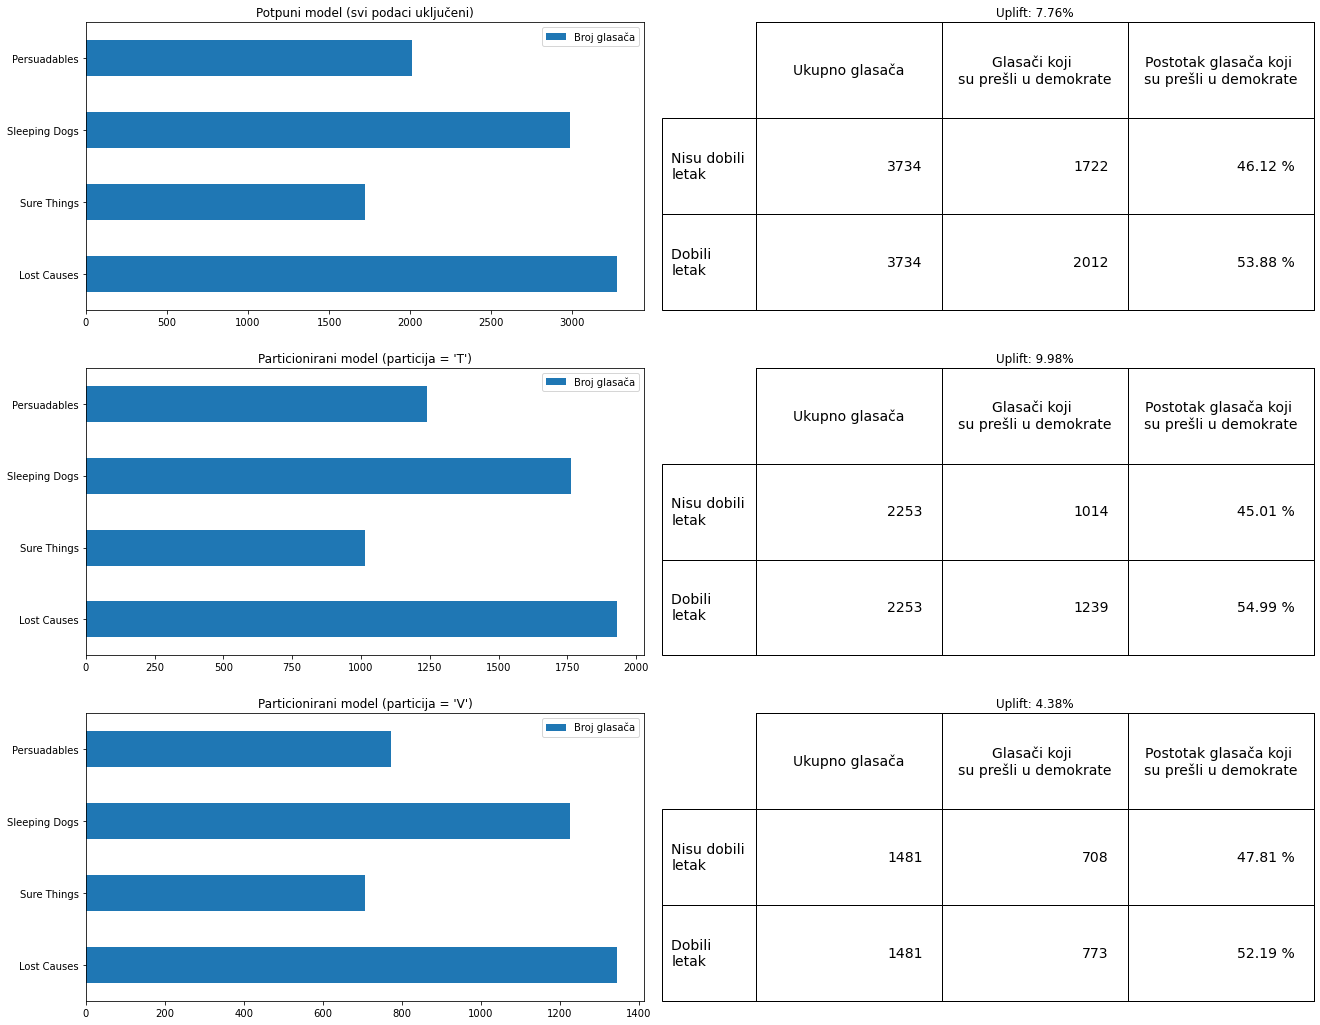

In [26]:
predictive_models = get_predictive_models(df)
predictive_df = plot_predictive_models(predictive_models)

## Matrica korelacije

Matrica korelacije prikazuje na koji način više varijabli međusobno utječu jedna na drugu. Nakon što se promatranjem međusobnog odnosa svih parova dvaju varijabli utvrdi njihova međusobna korelacija, izrađuje se matrica korelacije.

<AxesSubplot:>

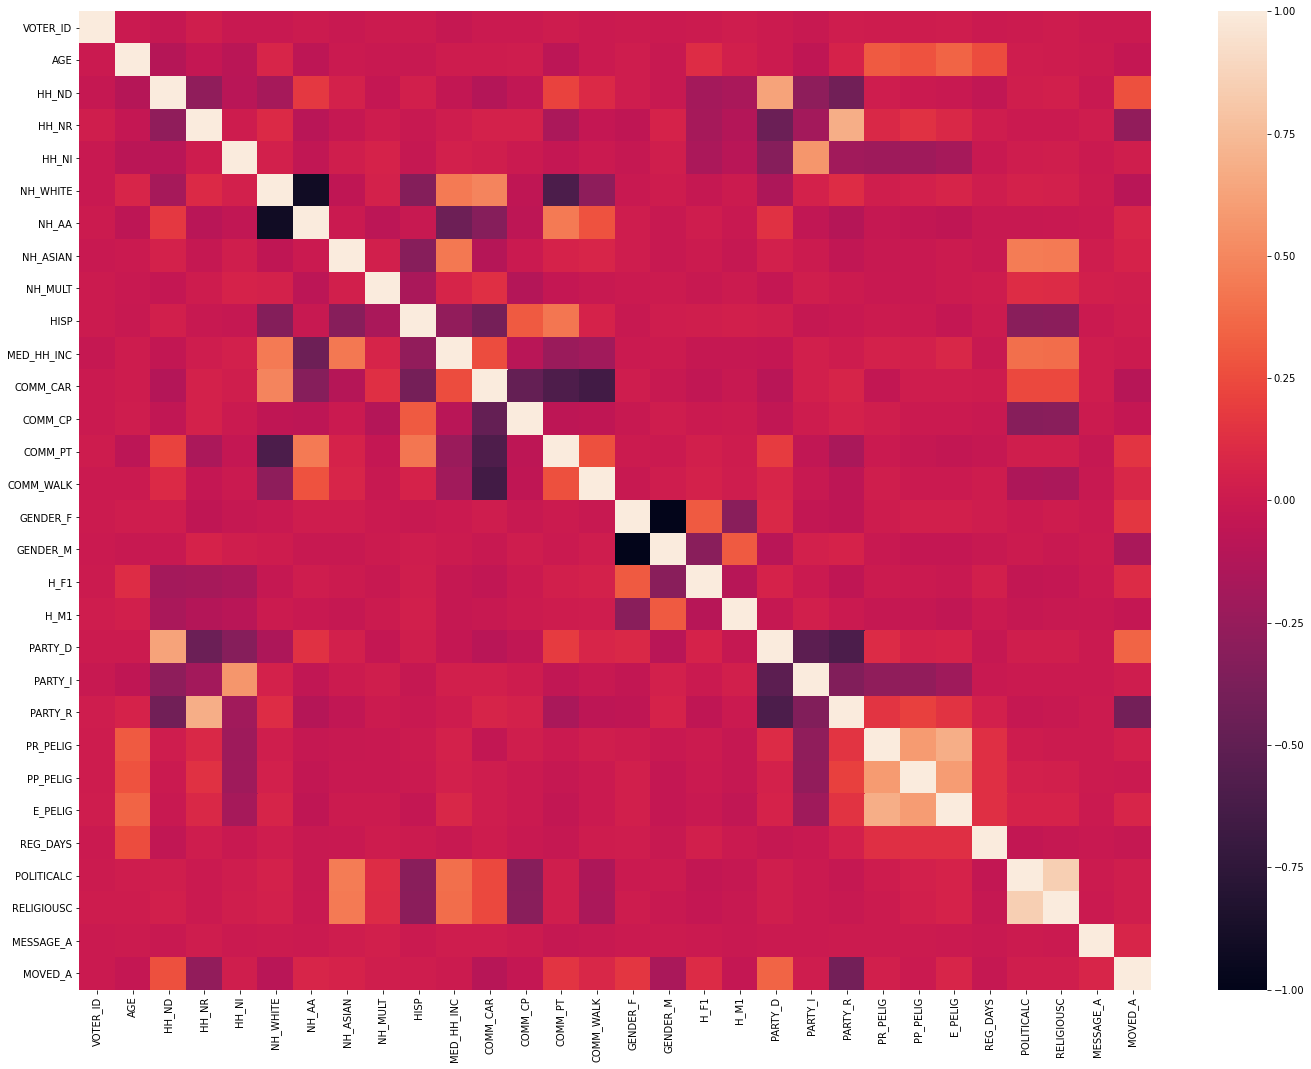

In [27]:
fig, ax = plt.subplots(figsize=(24, 18))
corr_df = predictive_df.corr()
sns.heatmap(corr_df, ax=ax)

In [1]:
highly_correlated_variables = [
    # Broj demokrata/republikanaca/nezavisnih u kućanstvu
    ['HH_ND', 'HH_NR', 'HH_NI'],
    # Etničke skupine u susjedstvu (%)
    ['NH_WHITE', 'NH_AA', 'NH_ASIAN'], 
    # Prikazuje u kojoj je političkoj stranci glasač
    ['PARTY_D', 'PARTY_R', 'PARTY_I'], 
    # Spol/jedna osoba u kućanstvu
    ['GENDER_M', 'GENDER_F', 'H_F1', 'H_M1'], 
    # Način odlaska na posao
    ['COMM_CAR', 'COMM_CP', 'COMM_PT', 'COMM_WALK'], 
]

titles = [
    'Broj demokrata/republikanaca/nezavisnih u kućanstvu',
    'Etničke skupine u susjedstvu (%)',
    'Prikazuje u kojoj je političkoj stranci glasač',
    'Spol/jedna osoba u kućanstvu',
    'Način odlaska na posao',
]

target_variable = ['MOVED_A']
colors = ['black', 'red', 'green', 'blue', 'yellow']
for c, variables in enumerate(highly_correlated_variables):
    ncols = len(variables)
    nrows = 1
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*8, ncols*2.5))
    fig.suptitle(titles[c], fontsize=16)
    for i, variable in enumerate(variables):
        if 'NH_AA' in variables:
            grouped_df = predictive_df[[variable] + target_variable].groupby(target_variable).mean()
        else:
            grouped_df = predictive_df[[variable] + target_variable].groupby(target_variable).sum()
        
        #grouped_df[variable] = grouped_df[variable].transform(lambda x: x*(100 / max(grouped_df[variable])))
        grouped_df[variable] = grouped_df[variable].transform(lambda x: x*(100 / sum(grouped_df[variable])))
        grouped_df.plot.bar(ax=ax[i], color=colors[c])

        ax[i].legend([rename_map[variable]])
        ax[i].set_ylim(0, 100)
        ax[i].set_xlabel(None)
        ax[i].set_xticklabels(["Nije prešao u demokrate", "Prešao u demokrate"], rotation=0)

NameError: name 'plt' is not defined

## Predviđanje uplifta

U nastavku se izrađuje Uplift model koji će pokazati sklonost glasača da on prijeđe u demonkratsku političku stranku.

In [18]:
from lightgbm import LGBMClassifier
from sklift.models import SoloModel
from sklearn.model_selection import train_test_split

predictive_models = get_predictive_models(df)
qini_coef = None
best_predictive_model = None

for predictive_model in predictive_models:
    corr_df = predictive_model['df'].corr()
    highly_correlated = [item for items in highly_correlated_variables for item in items]
    highly_correlated_df = corr_df[highly_correlated].loc['MOVED_A'].sort_values(ascending=False)
    highly_correlated_df = highly_correlated_df[highly_correlated_df > 0.07]
    
    X_name = highly_correlated_df.index.tolist()
    y_name = 'MOVED_A'
    trmnt_name = 'MESSAGE_A'
    
    X_train, X_test, y_train, y_test = train_test_split(predictive_model['df'][X_name + [trmnt_name]], predictive_model['df'][y_name], test_size=0.33, random_state=42)

    trmnt_train = X_train[trmnt_name]
    trmnt_test = X_test[trmnt_name]

    X_train = X_train.drop(trmnt_name, axis=1)
    X_test = X_test.drop(trmnt_name, axis=1)

    estimator = LGBMClassifier(n_estimators=10)
    slearner = SoloModel(estimator=estimator, method='treatment_interaction')

    # fit model
    slearner.fit(
        X=X_train,
        y=y_train,
        treatment=trmnt_train,
    )
    
    predictive_model['uplift_model'] = slearner
    uplift_slearner = slearner.predict(predictive_model['df'][X_name])
    
    y_true = predictive_model['df'][y_name]
    trmnt_val = predictive_model['df'][trmnt_name]
    
    predictive_model.update({
        'df': predictive_model['df'][X_name],
        'y_true': y_true,
        'trmnt_val': trmnt_val,
        
        'X_train': X_train,
        'y_train': y_train,
        'trmnt_train': trmnt_train,
        
        'X_test': X_test,
        'y_test': y_test,
        'trmnt_test': trmnt_test,
    })
    
    
    if qini_coef is None or predictive_model['qini_coef'] >= qini_coef:
        qini_coef = predictive_model['qini_coef']
        best_predictive_model = predictive_model

Sklonost prvih triju glasača da prijeđu u demokratsku stranku:

In [19]:
predictive_df = best_predictive_model['df']
uplift_model = best_predictive_model['uplift_model']
uplift_model.predict(best_predictive_model['X_test'].head(3))

array([ 0.04155152,  0.00924776, -0.04370395])

## Evaluacija uplift modela

### Qini krivulje

Qini krivulje su dobar alat za usporedbu uplift metoda. Kako ovaj primjer koristi samo jedan uplift model, sljedeća qini krivulja prikazuje performanse stvorenog modela (plava linija). Zelenom je linijom prikazana idealan uplift glasača, a narančastom je ispisana random linija koja spaja krajeve qini krivulje i idealne krivulje.

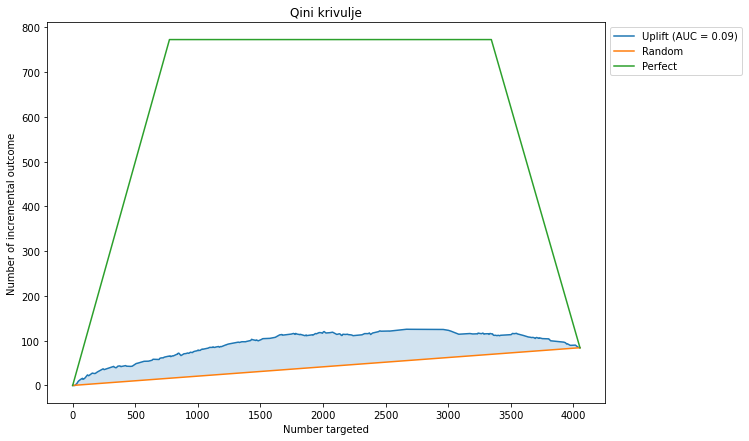

In [20]:
from sklift.viz import plot_qini_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_title('Qini krivulje')

plot_qini_curve(
    y_true=best_predictive_model['y_true'], 
    uplift=uplift_model.predict(predictive_df), 
    treatment=best_predictive_model['trmnt_val'],
    perfect=True, name='Uplift', ax=ax
)


Sljedeći grafovi prikazuju kretanje uplifta po postotku tretiranih glasača.  

Prvi graf (s crvenim stupcima) prikazuje razliku između broja ljudi koji su tretirani i prešli u demokratsku stranku te ljudi koji nisu tretirani i prešli su u demokratsku stranku.

array([<AxesSubplot:title={'center':'Uplift by percentile\nweighted average uplift = 0.0422'}>,
       <AxesSubplot:title={'center':'Response rate by percentile'}, xlabel='Percentile'>],
      dtype=object)

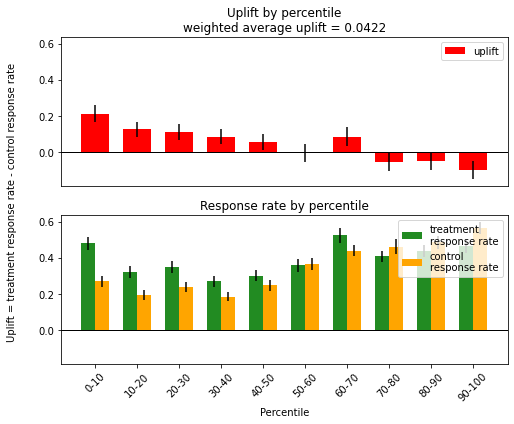

In [21]:
from sklift.viz import plot_uplift_by_percentile
import warnings
warnings.filterwarnings(action='ignore')

plot_uplift_by_percentile(
    y_true=best_predictive_model['y_true'], 
    uplift=uplift_model.predict(predictive_df),
    treatment=best_predictive_model['trmnt_val'], 
    kind='bar'
)

## Zaključak

Početni izračun uplifta nad promatranim podacima rezultirao je s 9.98% za najbolji model. Primjenom uplift prediktivnog modela, izračunat je uplift srednje vrijednosti 4.22%. U sklopu poboljšavanja performansi stvorenog modela, potrebno je koristiti različite metode u svrhu izračuna uplifta glasača te usporediti njihove rezultate.